# Dan Miller
## This Notebook will be used for Project 7 of Data Analytics Fundamentals
## 2/24/2025

## Imports

In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats

## Part 1 - Chart a Straight Line

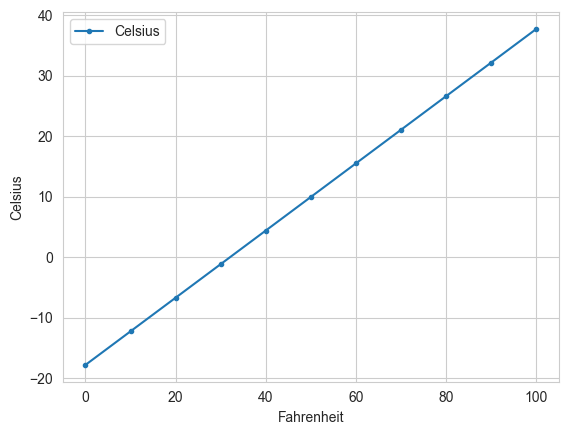

In [226]:
# Create the function
c = lambda f: 5/9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]

# Graph
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')
plt.show()

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [227]:
#Loading weather data
url = r'C:\Projects\IntroToPython\examples\ch10\ave_hi_nyc_jan_1895-2018.csv'
nyc_df = pd.read_csv(url)

### Section 2 - Data Inspection

In [228]:
# View the head of the data
print(nyc_df.head())

     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0


In [229]:
# View the tail of the data
print(nyc_df.tail())

       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


### Section 3 - Data Cleaning

In [230]:
# Rename 'Value' column to 'Temperature'
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Remove the '01' from the 'Date' column for readability
nyc_df.Date = nyc_df.Date.floordiv(100)

print(nyc_df.head())

   Date  Temperature  Anomaly
0  1895         34.2     -3.2
1  1896         34.7     -2.7
2  1897         35.5     -1.9
3  1898         39.6      2.2
4  1899         36.4     -1.0


### Section 4 - Descriptive Statistics

In [231]:
# Set display precision to 2 decimal places then display the stats
pd.set_option('display.precision', 2)
print(nyc_df.describe())

          Date  Temperature  Anomaly
count   124.00       124.00   124.00
mean   1956.50        37.60     0.20
std      35.94         4.54     4.54
min    1895.00        26.10   -11.30
25%    1925.75        34.58    -2.82
50%    1956.50        37.60     0.20
75%    1987.25        40.60     3.20
max    2018.00        47.60    10.20


### Section 5 - Build the Model

In [232]:
# Calculate the linear regression line
linear_regression = stats.linregress(nyc_df.Date, nyc_df.Temperature)
print((f'slope: {linear_regression.slope:.2f}\n'))  # slope
print((f'y-intercept: {linear_regression.intercept:.2f}\n'))  # y-intercept

slope: 0.01

y-intercept: 8.69



### Section 6 - Predict

In [233]:
# Predict the average high temperature in January for 2024
predicted_temp = linear_regression.slope * 2024 + linear_regression.intercept
print(f'The predicted average high temperature in January for 2024 is: {predicted_temp:.2f} Fahrenheit')

The predicted average high temperature in January for 2024 is: 38.59 Fahrenheit


### Section 7 - Visualizations

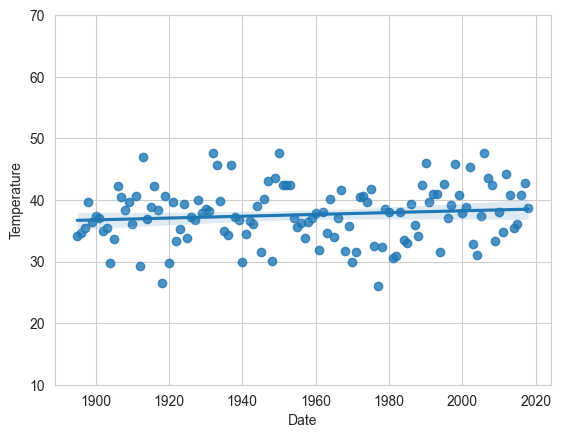

In [234]:
# Graph the linear regression line with the data
sns.set_style('whitegrid')
axes = sns.regplot(x='Date', y='Temperature', data=nyc_df)
axes.set_ylim(10, 70)
plt.show()

## Part 3 - Prediction

### Section 1 - Build the Model

In [235]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature.values, random_state=11)

# Check the shape of the training and testing sets
print(x_train.shape)

(93, 1)


In [236]:
print(x_test.shape)

(31, 1)


In [237]:
# Train the model using linear regression from sklearn
linear_regression = LinearRegression()
linear_regression.fit(X=x_train, y=y_train)

# Print the slope and intercept of the model
print(f'Slope: {linear_regression.coef_}')
print(f'Intercept: {linear_regression.intercept_}')

Slope: [0.01939167]
Intercept: -0.30779820252656975


### Section 2 - Test the Model

In [238]:
# Now make predictions to assess the model's accuracy
predicted = linear_regression.predict(x_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

In [239]:
# Predict the average high temperature in January for 2024
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predicted_temp = predict(2024)
print(f'The predicted average high temperature in January for 2024 is: {predicted_temp[0]:.2f} Fahrenheit')

The predicted average high temperature in January for 2024 is: 38.94 Fahrenheit


### Section 4 - Visualizations

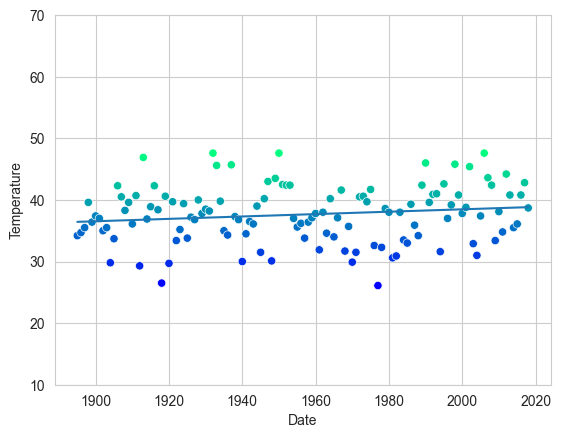

In [240]:
# Use Seaborn to create a scatter plot with a regression line

axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
plt.plot(x, y)

plt.show()

## Part 4 - Insights

When comparing the two graphs that were made, they look nearly identical.  Although there are differences regarding the smoothness of the line and the color of the datapoints, they create what can be deemed as the same outcome.  

Near identical graphs is a good thing to have as they both used linear regression, so we know that when it comes down to deciding to use scipy or sklearn, neither one is ultimately better suited for linear regressiion than the other.  When discussing runtime, there may have been a difference of milliseconds, which is disregardable considering they both ran in less than one second.  

Finally, with regards to the temperature prediciton for 2024, there was only a difference of 0.35 degrees.  In terms of temperature, this difference is very minimal, and the human body wouldn't be able to tell the difference.  Again, the point stands that both ways of achieving a linear regression line work just as well.  One might be ever so slightly more accurate than the other, but the difference between them makes that slightly greater accuracy nothing to worry about.  